# Analysis of the dataset
The python script **example_physionet.py** found in the downloaded dataset contains code to build the train and test sets from the raw data. The most relevant part of the code for the current challenge is the function that reads the ECG signal records in WaveForm DataBase format. The read operation is achieved with the function rdsamp from **wfdb** package. After a first look at the [documentation](https://wfdb.readthedocs.io/en/latest/) it seems that the packages offers all the necessary tools to complete several tasks of the challenge.  

In [3]:
!pip install wfdb

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 161.7/161.7 kB 440.3 kB/s eta 0:00:00
     -------------------------------------- 62.8/62.8 kB 674.4 kB/s eta 0:00:00
     ---------------------------------------- 39.8/39.8 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 161.1/161.1 kB 3.2 MB/s eta 0:00:00


## wfdb Python package
Let's inspect some of the available functions to read WFDB objects and their returned output.

In [39]:
import wfdb

TEST_SAMPLE_PATH = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000\\00001_lr'

# Returns Record object
data_header = wfdb.rdheader(TEST_SAMPLE_PATH)
print(type(data_header))

# Returns Record object
data_record = wfdb.rdrecord(TEST_SAMPLE_PATH)
print(type(data_record))

# Returns a tuple containing a 2d numpy array storing the physical signals from the record and 
# a dictionary containing several key attributes of the read record
data_sample = wfdb.rdsamp(TEST_SAMPLE_PATH)
print(type(data_sample))
print(type(data_sample[0]))
print(type(data_sample[1]))

# Returns an Annotation object
data_ann = wfdb.rdann(TEST_SAMPLE_PATH, 'hea')
print(type(data_ann))



<class 'wfdb.io.record.Record'>
<class 'wfdb.io.record.Record'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'dict'>
<class 'wfdb.io.annotation.Annotation'>


Apparently, only the **Record** object returned by wfdb.rdrecord contains the signal data. This data corresponds with the 2d array returned by data_sample. 

In [40]:
print(data_header.p_signal)
print(data_header.d_signal)
print(data_record.p_signal)
print(data_record.d_signal)
print(data_sample[0])
print(data_sample[1])

None
None
[[-0.119 -0.055  0.064 ... -0.026 -0.039 -0.079]
 [-0.116 -0.051  0.065 ... -0.031 -0.034 -0.074]
 [-0.12  -0.044  0.076 ... -0.028 -0.029 -0.069]
 ...
 [ 0.069  0.    -0.069 ...  0.024 -0.041 -0.058]
 [ 0.086  0.004 -0.081 ...  0.242 -0.046 -0.098]
 [ 0.022 -0.031 -0.054 ...  0.143 -0.035 -0.12 ]]
None
[[-0.119 -0.055  0.064 ... -0.026 -0.039 -0.079]
 [-0.116 -0.051  0.065 ... -0.031 -0.034 -0.074]
 [-0.12  -0.044  0.076 ... -0.028 -0.029 -0.069]
 ...
 [ 0.069  0.    -0.069 ...  0.024 -0.041 -0.058]
 [ 0.086  0.004 -0.081 ...  0.242 -0.046 -0.098]
 [ 0.022 -0.031 -0.054 ...  0.143 -0.035 -0.12 ]]
{'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}


An **Annotation** object contains the following information:

In [5]:
print("record_name:\n", data_ann.record_name)
print("extension:\n", data_ann.extension)
print("sample:\n", data_ann.sample)
print("symbol:\n", data_ann.symbol)
print("subtype:\n", data_ann.subtype)
print("chan:\n", data_ann.chan)
print("num:\n", data_ann.num)
print("aux_note:\n", data_ann.aux_note)
print("fs:\n", data_ann.fs)
print("label_store:\n", data_ann.label_store)
print("description:\n", data_ann.description)
print("custom_labels:\n", data_ann.custom_labels)
print("contained_labels:\n", data_ann.contained_labels)

record_name:
 00001_lr
extension:
 hea
sample:
 [   48    96   913  1533  1821  1871  1920  1968  2017  2065  2075  2123
  2427  2522  3148  3504  3620  4181  4469  4517  5077  5125  5429  5732
  5818  6379  6411  6699  7004  7061  7366  7414  7446  7734  7744  7792
  8096  8191  8817  9173  9289  9850 10138 10186 10746 10794 11098 11401
 11487 12048 12080 12368 12677 13477 14295 14327 14615 15200 15248 15296
 16113 16733 16779 16876 17164 17218 17267 17315 17361 17401 18210 18831
 19119 19173 19221 19275 19819 20639 20692 20724 21012 21341 21351 21399
 21703 21798 22424 22780 22896 23457 23745 23793 24353 24401 24705 25008
 25094 25655 25687 25719 25773 25827 26391 26442 26490 27067 27661 27709
 27757 28574 29194 29240 29337 29625 29679 29728 29776 29822 29862 30671
 31292 31580 31634 31682 31983 32032 32593 32898 32930 33218 33304 33314
 33362 33666 33761 34387 34743 34859 35420 35708 35756 36316 36364 36668
 36971 37057 37618 37650 37682 38482 38514 38802 39400 39410 39458 39762
 39

Where annotation codes are the following:

In [6]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

I don't understand why the indexes in data_ann.sample take values larger than the number of data points in the signal, which is either 1000 or 5000. I also found that there are samples whose annotation can not be read.

In [34]:
import os

# Get the IDs of samples that cannot be read in a given directory
base_dir = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\06000'
samples_failed_read = []
for file in os.listdir(base_dir):
    if '.hea' in file:
        path = f'{base_dir}\\{file}'.replace('.hea','')
        try:
            tmp = wfdb.rdann(path, 'hea')
        except:
            samples_failed_read.append(f'{file}')
    
print(f'Number of annotation samples that fail read operation in directory \n{base_dir}:\n{len(samples_failed_read)}')

Number of annotation samples that fail read operation in directory 
data\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records100\06000:
509


There are many things that don't make sense, so I have decided to look for more information about WFDB file types. I have found a comprehensive description of the file types in [this link](https://www.physionet.org/physiotools/wpg/wpg_35.htm#Header-Files). Apparently, the dataset only contains header and signal files. This means that wfdb.rdheader reads a header file and returns a Record, wfdb.rdrecord reads a signal file and return a Record, and wfdb.rdsam returns a tuple with the signal and a dict containing several attributes of the record. From the three, I believe the last function is the most useful. 

In [44]:
sample_path = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000\\00001_lr'

# Returns Record object
data_header = wfdb.rdheader(sample_path)
print(data_header.p_signal)
print(data_header.d_signal)

# Returns Record object
data_record = wfdb.rdrecord(sample_path)
print(data_record.p_signal)
print(data_record.d_signal)
print(data_record.sig_name)

# Returns a tuple containing a 2d numpy array storing the physical signals from the record and 
# a dictionary containing several key attributes of the record
data_sample = wfdb.rdsamp(sample_path)
print(data_sample[0])
print(data_sample[1])


None
None
[[-0.119 -0.055  0.064 ... -0.026 -0.039 -0.079]
 [-0.116 -0.051  0.065 ... -0.031 -0.034 -0.074]
 [-0.12  -0.044  0.076 ... -0.028 -0.029 -0.069]
 ...
 [ 0.069  0.    -0.069 ...  0.024 -0.041 -0.058]
 [ 0.086  0.004 -0.081 ...  0.242 -0.046 -0.098]
 [ 0.022 -0.031 -0.054 ...  0.143 -0.035 -0.12 ]]
None
['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
[[-0.119 -0.055  0.064 ... -0.026 -0.039 -0.079]
 [-0.116 -0.051  0.065 ... -0.031 -0.034 -0.074]
 [-0.12  -0.044  0.076 ... -0.028 -0.029 -0.069]
 ...
 [ 0.069  0.    -0.069 ...  0.024 -0.041 -0.058]
 [ 0.086  0.004 -0.081 ...  0.242 -0.046 -0.098]
 [ 0.022 -0.031 -0.054 ...  0.143 -0.035 -0.12 ]]
{'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}


# Ploting the signal
The wfdb package provides three functions to plot the data.
- **wfdb.plot_all_records** plots all WFDB records in a directory (by finding header files), one at a time, until the ‘enter’ key is pressed
- **wfdb.plot_items** subplots individual channels of signals and/or annotations.
- **wfdb.plot_wfdb** plots all individual channels of a WFDB record and/or annotation.

I believe the last two functions are the most suitable for the visualization of the signals. 

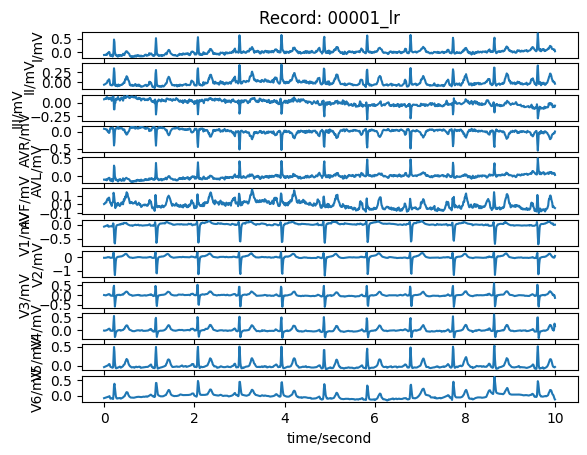

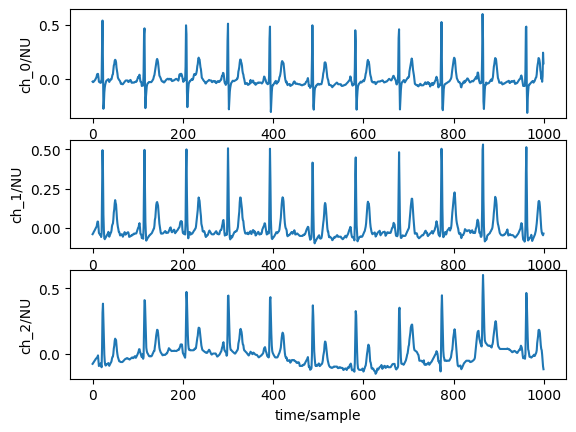

In [86]:
sample_path = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000\\00001_lr'

# Plot all signals in the Record, from Record object
sample_record = wfdb.rdrecord(sample_path)
wfdb.plot_wfdb(sample_record)
# Plot last three signals from np.array containing all the signals
sample_signal, sample_dict = wfdb.rdsamp(sample_path)
wfdb.plot_items(sample_signal[:, -3:])


Just as a check, the signals are plot with matplotlib. The resulting plot is exactly the same. 

In [97]:
import matplotlib.pyplot as plt

sample_mat = data_sample[0]
fig, axes = plt.subplots(nrows=sample_mat.shape[1], ncols=1)
for i in range(sample_mat.shape[1]):
    axes[i].plot(sample_mat[:, i])
plt.show()

NameError: name 'data_sample' is not defined

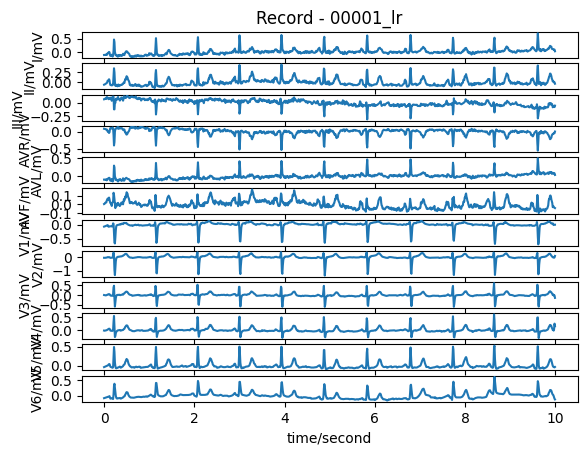

Press enter to continue...


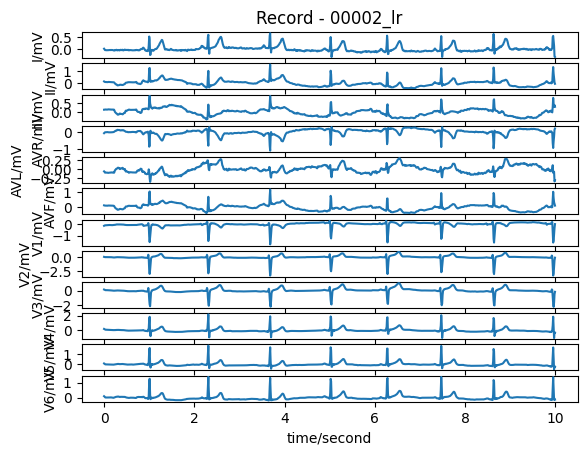

Press enter to continue...


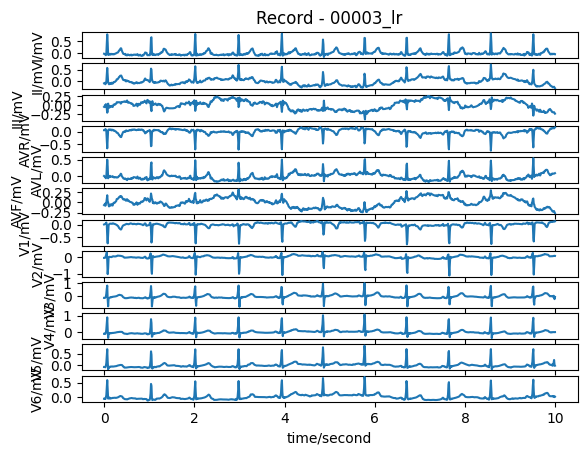

Press enter to continue...


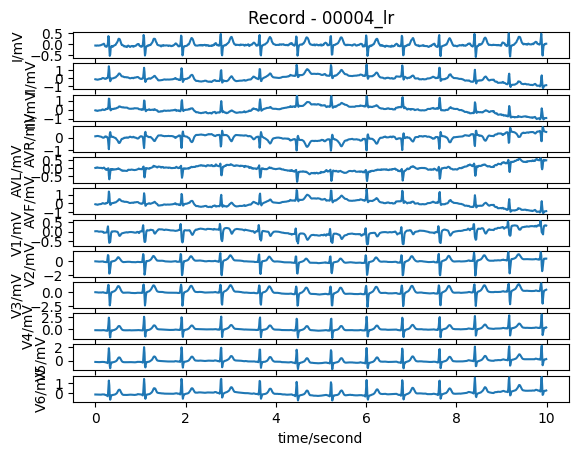

Press enter to continue...


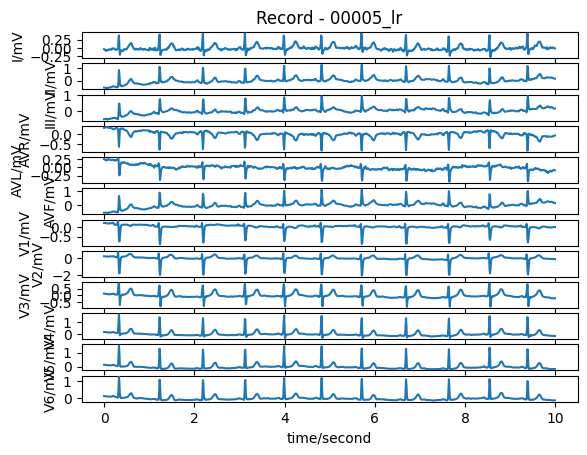

Press enter to continue...


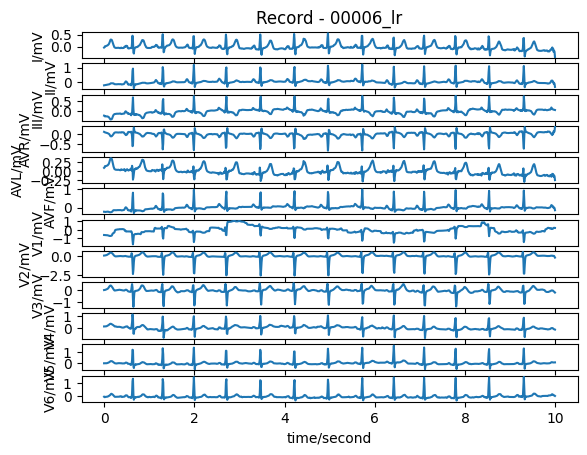

Press enter to continue...


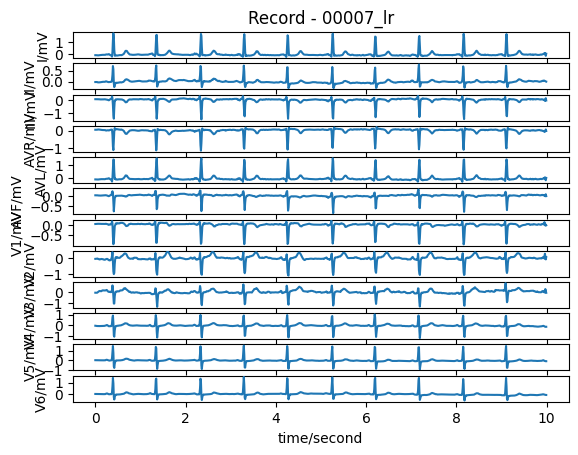

Press enter to continue...


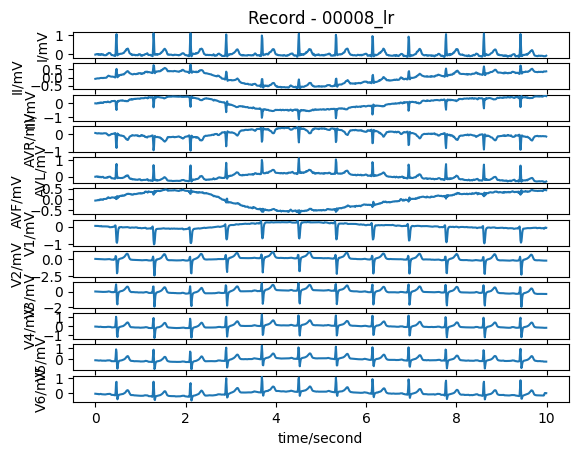

Press enter to continue...


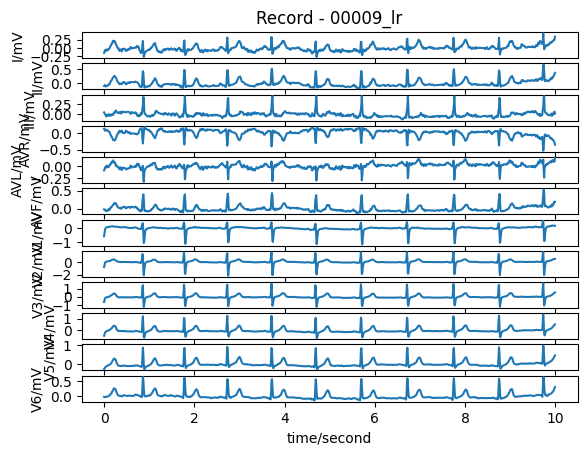

Press enter to continue...


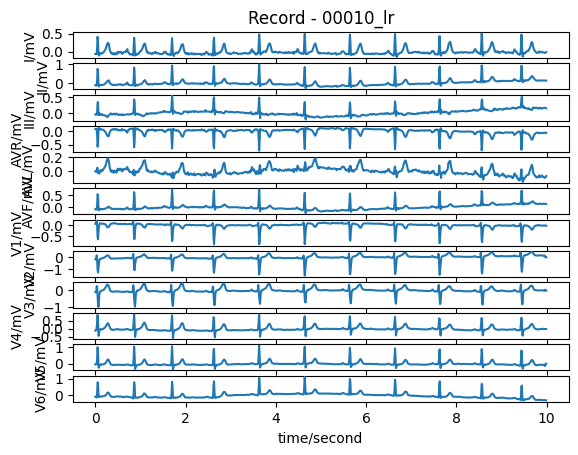

Press enter to continue...


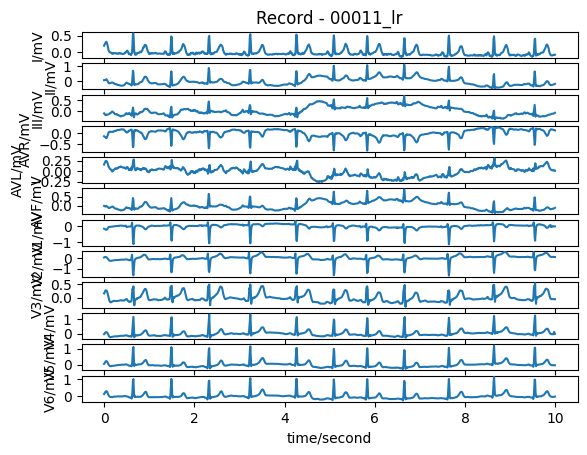

Press enter to continue...


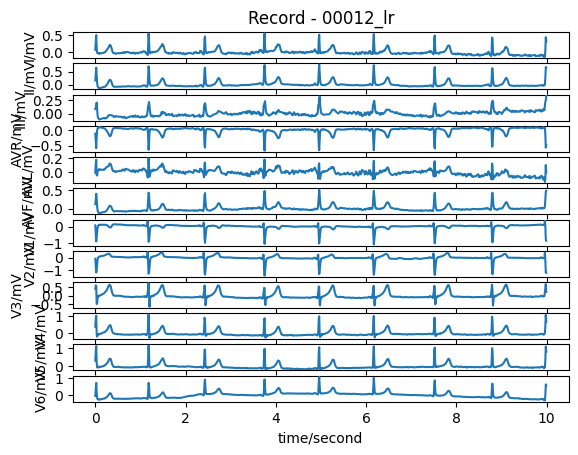

Press enter to continue...


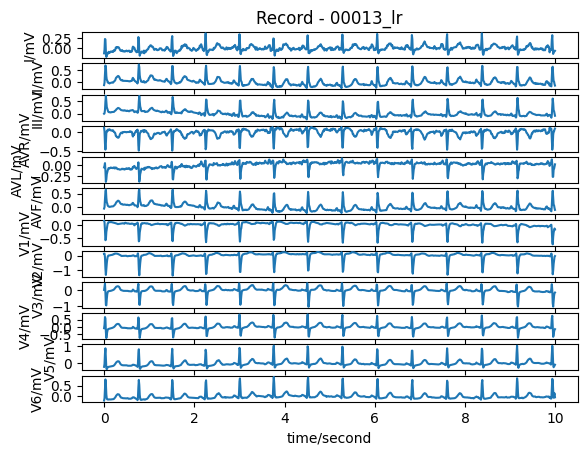

Press enter to continue...


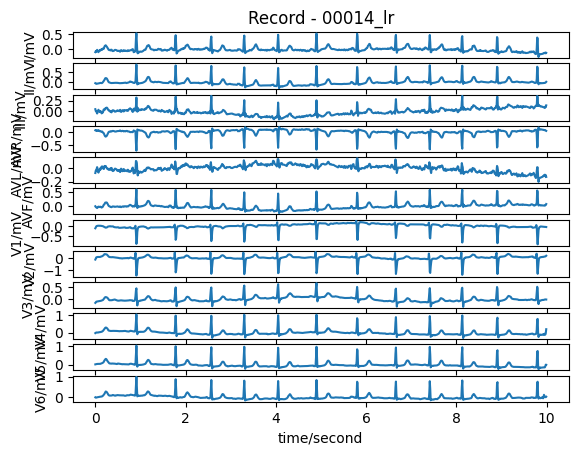

Press enter to continue...


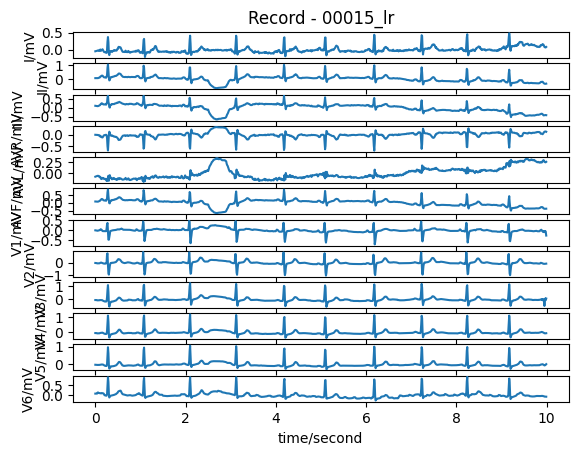

KeyboardInterrupt: Interrupted by user

In [87]:
wfdb.plot_all_records('data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000')

# Obtain annotations from csv file
All the code necessary to obtain the anotations corresponding to the signals is found in the python script **example_physionet.py**, wich is provided in the downloaded dataset. In the code below, Y is a DataFrame that contains all the data in file ptbxl_database.csv.


In [3]:
import pandas as pd

path = 'data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/'

Y = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')
print(f'The number of rows in the data frame is {Y.shape[0]}')

The number of rows in the data frame is 21801


However, although the readme file says that there are 21837 records, in reality there are only 21801 records in the database. Therefore, the number of rows in the DataFrame matches the number of recorded signals in the database. The index of the last sample in the dataset has the number 21837, wich means that there are 36 missing recordings. 

In [13]:
import os 

path = 'data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/records100'

records = []
for (root, dirs, files) in os.walk(path):
    records.extend([file for file in files if '.dat' in file])

print(f'The number of different records in the database is {len(records)}')

The number of different records in the database is 21801


# Heart beat identification



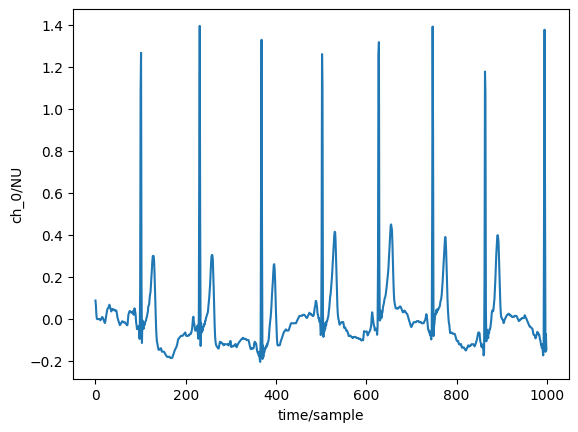

In [88]:
import wfdb
import numpy as np

sample_path = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000\\00002_lr'

sample_signal, sample_dict = wfdb.rdsamp(sample_path)
signal = sample_signal[:,-1]

wfdb.plot_items(signal)


In [89]:
def get_hb_positions_in_signal(signals, sampling_freq):
    MAX_HB = 200
    THRESH = 0.06
    signal = signals[:,4]
    n_points = signal.shape[0]
    window_points = int(sampling_freq * (60 / MAX_HB))
    
    window_list = [signal[idx : idx + window_points] for idx in range(0, n_points, window_points)]
    plt.plot([np.std(window) for window in window_list])
    plt.show()
    hb_pos = [window_points * idx + int(np.where(window == np.max(window))[0]) \
              for idx, window in enumerate(window_list) if np.std(window) > THRESH]
    return hb_pos


def get_average_total_hb(hb_pos):
    hb_point_dist = [hb_pos[i+1] - hb_pos[i] for i in range(len(hb_pos)-1)]
    average_hb_point_dist = np.mean(np.array(hb_point_dist))
    average_hb = 60 / (average_hb_point_dist / SAMPLING_FREQ_HZ)
    return average_hb, len(hb_pos)

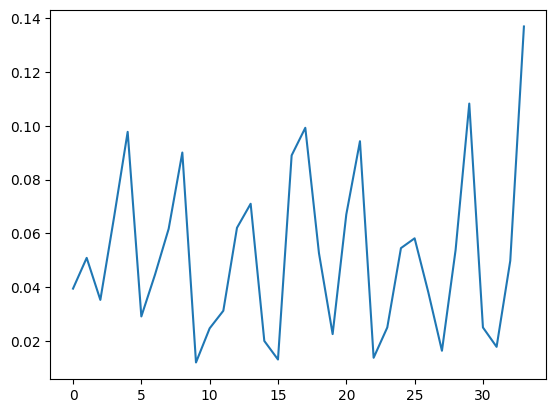

TypeError: only size-1 arrays can be converted to Python scalars

In [90]:
SAMPLING_FREQ_HZ = 100
sample_path = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000\\00002_lr'

record_signals, record_dict = wfdb.rdsamp(sample_path)

hb_pos = get_hb_positions_in_signal(record_signals, SAMPLING_FREQ_HZ)
print(hb_pos)

average_hb, total_hb = get_average_total_hb(hb_pos)
print(average_hb, total_hb, sep='\n')

In [83]:
import os

SAMPLING_FREQ_HZ = 100
path = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000'

for (root, dirs, files) in os.walk(path):
    for file in files:
        if '.dat' in file:
            record_signals, _ = wfdb.rdsamp(f'{root}\\{file.split(".")[0]}')
            hb_pos = get_hb_positions_in_signal(record_signals, SAMPLING_FREQ_HZ)
            average_hb, total_hb = get_average_total_hb(hb_pos)
            print(average_hb, total_hb, sep='\n')
            
            

63.897763578274756
11


TypeError: only size-1 arrays can be converted to Python scalars

wfdb package provides functions to identify the heart beats and compute average heart beat, but I can't make it work 

In [101]:
from wfdb import processing

processing.ann2rr('data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000\\00001_lr', extension='dat')


IndexError: index 12024 is out of bounds for axis 0 with size 12000